In [1]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# iris = datasets.load_iris()   ## we run this on first run with all features.
# x = iris.data
# y = iris.target

## 4. So while we fetch the data, we need all the rows, but in terms of columns we only need 0 and 1.
## 4. so we run again.  
iris = datasets.load_iris()
x = iris.data[:, 0:2]
y = iris.target

In [8]:
x_train,x_test, y_train, y_test = train_test_split(x, y)

In [9]:
## 1. we need to creat our classifier.  
clf = svm.SVC()
clf.fit(x_train, y_train)


SVC()

### Now we look at some of the options.  
**C*(*C* = 1.0)** : We had function here C * somefunction + Regularization. So the idea is higher the C, we will be more focused on not making training errors and we will not be worried about Regularization. If C is high, we will be overfitting. If C is less, we will be underfitting. So we need to get to optimal value of C.This is first thing we need to choose.    
  
**class_weight (*Class_weight = None*)**: If we want to have some kind of prior probablities we want to give some biased towards a particular class or the other None means equal probablities or equal weight to all the classes.  
  
**coef0* (*coef0 = 0.0*)**: This is not used in case of RBF or Linear, this is used in the case of Polynomial. In Polynomial we discussed that $(X^TL + a)^b$ where a is this coef0.
  
**decision_function_shape (decision_function_shape='ovr)** : Used for filling up some API requirements.  
  
**gamma (gamma = 'auto')** : gamma is actually $\frac{1}{2\sigma^2}$.(ref 8th lec notes).  
   
**kernel (kernel='rbf')** : kernel.   
_____________________________________________________________________
**SVC implements one vs one scheme and it does not give you option to use one vs rest.  
We have one option to use SVC, we can also use something called LinearSVC, which means it is only going to use linear kernel and it implements one vs rest scheme.**  


In [14]:
## 2. we can look at the score one fitting is done.
clf.score(x_test, y_test)  
## it gives a good score on this.  

## 5. we dont get a good score because we run only on two features.

0.868421052631579

In [11]:
## 3.Now we need to plot the decision boundary.  
## 3.So if we use LinearSVC, we might see linear boundary but in case of rbf, we might see non-linear decision boundaries.  

## 3.To plot data we can only use two features x1 and x2.  
def makegrid(x1, x2, h = 0.02):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1  ## what are we doing here we are finding minimum and the max.
    x2_min, x2_max = x2.min() - 1, x2.max() + 1  ## and we do -1 and +1 so that it covers little more area than required.
    a = np.arange(x1_min,x1_max,h)         ## this will give range from x1_min to x2_max. 
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a, b)           ## 
    return xx, yy


In [12]:
## idea.
## 6. The idea is we know x is from 1 - 3 and we know y is from 2 - 5.  
## 6. SO we find all the points and call predict on them. Then we know which class we going to predict on each point.
## 6. If we color them differently, we get our decision boundary.  

## lets call makegrid() on dummy data. 

x1 = np.array([1,3])
x2 = np.array([5,6])
makegrid(x1,x2)

## 7.what happened is we have 1,3 it decided to go from 0 to 4. (min-1, max+1).  
## 7.so it created the array and repeated it multiple times.  
## 7.Similarly for second one it go from 4 to 7.  
## 7.Thats what makegrid did.  
## 7.once we have makegrid, what we do is we combine them, callprediction and basically we are going tp try and plot it.  


(array([[0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        ...,
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98]]),
 array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
        [4.02, 4.02, 4.02, ..., 4.02, 4.02, 4.02],
        [4.04, 4.04, 4.04, ..., 4.04, 4.04, 4.04],
        ...,
        [6.94, 6.94, 6.94, ..., 6.94, 6.94, 6.94],
        [6.96, 6.96, 6.96, ..., 6.96, 6.96, 6.96],
        [6.98, 6.98, 6.98, ..., 6.98, 6.98, 6.98]]))

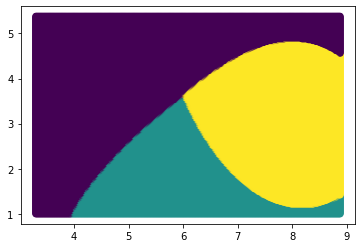

In [13]:
## 8. so we pass ofirst feature, second featureso we get above type of array for those features then
## 8. ravel will convert this into 1d array huge 1d array and then
## 8. np.c_ will combine this into a pair and then for plotting we call ravel() again for converting into 1d array.

xx, yy = makegrid(x[:, 0], x[:, 1])  
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

## this is for rbc kernel.

 ## now doing it for linear kernel


In [15]:

clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [16]:
clf.score(x_test, y_test)  


0.868421052631579

In [17]:
def makegrid(x1, x2, h = 0.02):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1  ## what are we doing here we are finding minimum and the max.
    x2_min, x2_max = x2.min() - 1, x2.max() + 1  ## and we do -1 and +1 so that it covers little more area than required.
    a = np.arange(x1_min,x1_max,h)         ## this will give range from x1_min to x2_max. 
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a, b)           ## 
    return xx, yy

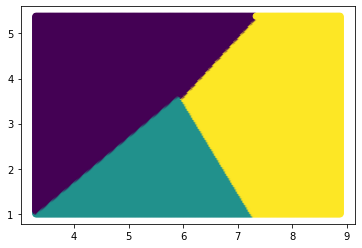

In [18]:
xx, yy = makegrid(x[:, 0], x[:, 1])  
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()
## this is for linear kernel. To know which kernel is performing better, look at the score.
## we can play around with gamma values so that we can get optimal values.  

In [ ]:
## in next, we see how to find best value of c and gamma.  